# Дата и время в Pandas

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

## Работа с временнЫми метками (Timestamp)

Для работами с объектами, описывающими некоторую точку во времени, Pandas предоставляет тип `Timestamp` (англ. "метка времени"). 

Это замена типу `datetime`, имеющемуся в чистом Питоне, и отличается от последнего тем, что основан на более эффективно реализованном типе `numpy.datetime64` из библиотеки Numpy.

You can create a simple date time as a `Timestamp` using the Pandas `to_datetime` functions which takes a string to parse:

Чтобы создать дату в виде объекта класса `Timestamp`, в библиотеке Pandas можно воспользоваться методом `to_datetime`, который принимает на вход строку и распозняет (parse - парсит) в ней дату/время:

In [23]:
date = pd.to_datetime("14th of October, 2018")
date

Timestamp('2018-10-14 00:00:00')

Кроме того, можно использовать конструктор объектов `Timestamp` напрямую:

In [24]:
date = pd.Timestamp(year=2018, month=10, day=14, hour=12, minute=0, second=30)
python_datetime = date.to_pydatetime()
print(date)
print(type(date))
print(python_datetime)
print(type(python_datetime))

2018-10-14 12:00:30
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-10-14 12:00:30
<class 'datetime.datetime'>


Доступ к информации, хранящейся в объекте `Timestamp`, можно получить обращаясь к атрибутам объекта.

Полный список атрибутов здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html#pandas.Timestamp

In [25]:
print(date.day)
print(date.dayofyear)
print(date.week)
print(date.month)
print(date.year)
print(date.hour)
print(date.minute)
print(date.second)

14
287
41
10
2018
12
0
30


## Работа с временнЫми рядами (Time Series)

In [26]:
datetimes = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                              '2015-07-04', '2015-08-04'])

In [27]:
datetimes

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [28]:
data = pd.Series([10, 4, 14, 30], index=datetimes)

In [29]:
data

2014-07-04    10
2014-08-04     4
2015-07-04    14
2015-08-04    30
dtype: int64

In [30]:
data['2015']

2015-07-04    14
2015-08-04    30
dtype: int64

In [31]:
type(data)

pandas.core.series.Series

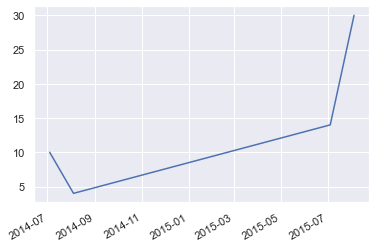

In [32]:
data.plot();

### Создание диапазона дат

Можно создать диапазон (англ. "range") дат, задав две отстоящие друг от друга даты. По умолчанию интервал между датами равен одному дню.

In [33]:
dates = pd.date_range('2015-07-03', '2015-07-10')

Можно создавать более специфичные интервалы, задав количество периодов и частоту повторений. Например, в следующем примере частота повторений задана как `W`, что значит "неделя" (week).

In [34]:
weeks = pd.date_range('2018 Oct 1', periods = 10, freq = 'W')
weeks

DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

### Класс Timedelta

Pandas позволяет выполнять арифметические операции над датами, результатом которых являются дэльты (объект `Timedelta`, разница между двумя точками во времени, выраженная в разных единицах, как то "день", "час", "минута" и т.д.):

In [35]:
weeks - weeks[0]

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days'],
               dtype='timedelta64[ns]', freq=None)

Можно создавать свои собственные дэльты и прибавлять их к объектам `Timestamp`

In [36]:
new_timestamp = weeks[1] + pd.Timedelta(days=3, hours=12, minutes=30)

In [37]:
new_timestamp

Timestamp('2018-10-17 12:30:00', freq='W-SUN')

## Упражнения

Давайте посмотрим на исторические данные о биржевых котировка компании Google. Они представлены как временной ряд с разбивкой по датам.

Обратите внимание, что для того, чтобы создать объект `DatetimeIndex`,  мы должны задать столбец `Date` в качестве индекса (`index`) и использовать `parse_dates=True`.

In [38]:
goog = pd.read_csv('data/goog.csv', index_col="Date", parse_dates=True)
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600,806.650024


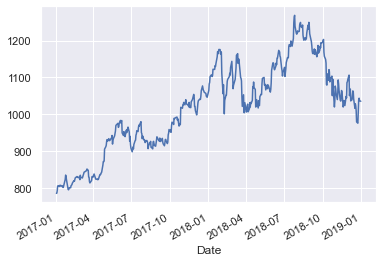

In [39]:
goog['Close'].plot();

### Найдите дату, когда цена закрытия (closing price) была наибольшей в 2018 году

In [44]:
# место для кода
goog['Close']['2018'].argmax()

142

### Найдите медианную цену закрытия в 2018 году

In [46]:
# место для кода
goog['Close']['2018'].median()

1103.97998046875

### Найдите среднюю цену закрытия в 2018 году

In [48]:
# место для кода
goog['Close']['2018-01'].mean()

1130.7704671223958

## Часовые пояса (timezones, tz)

Импортируйте библиотеку `pytz` и распечатайте все имеющиеся часовые пояса (timezones)

In [49]:
# место для кода
import pytz

pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [51]:
london = pd.Timestamp.now(tz="Europe/London")
brussels = london.tz_convert("Europe/Brussels")
minsk = london.tz_convert('Europe/Minsk')
print(london)
print(brussels)
print(minsk)

2020-10-27 13:18:27.623114+00:00
2020-10-27 14:18:27.623114+01:00
2020-10-27 16:18:27.623114+03:00


In [52]:
london.timetz()

datetime.time(13, 18, 27, 623114, tzinfo=<DstTzInfo 'Europe/London' GMT0:00:00 STD>)

In [53]:
london.tz_convert("UTC")

Timestamp('2020-10-27 13:18:27.623114+0000', tz='UTC')

## Распознавание (parsing) дат непосредственно в момент создания/рагрузки DataFrame

### `pandas.to_datetime`

In [54]:
dates = ["22-05-2019", "21-04-2018", "13-01-2018"]
data = {"events": ["BUY", "SELL", "SELL"], "dates": dates}

In [55]:
df = pd.DataFrame(data)

In [56]:
df.dtypes

events    object
dates     object
dtype: object

In [57]:
df["datetime"] = pd.to_datetime(df["dates"])

In [58]:
df

,events,dates,datetime
0,BUY,22-05-2019,2019-05-22
1,SELL,21-04-2018,2018-04-21
2,SELL,13-01-2018,2018-01-13


In [65]:
df.dtypes

events    object
dtype: object

In [64]:
df = df.set_index("datetime")
df.drop(['dates'], axis=1, inplace=True)

KeyError: "None of ['datetime'] are in the columns"

In [61]:
df.head()

,events
datetime,
2019-05-22,BUY
2018-04-21,SELL
2018-01-13,SELL


In [68]:
df['2019']

AssertionError: <class 'numpy.ndarray'>

In [63]:
df[df.index.day == 21]

,events
datetime,
2018-04-21,SELL


# `pandas.read_csv`

In [69]:
df = pd.read_csv("data/sample_events.csv")
df.dtypes

date     object
event    object
dtype: object

In [70]:
df = pd.read_csv("data/sample_events.csv", parse_dates=["date"], index_col='date')
df.dtypes

event    object
dtype: object

In [71]:
df["2019-06"].event.value_counts()

BUY     363
SELL    357
Name: event, dtype: int64